In [280]:
#import des libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [281]:
#chemin

file_path = "car_prices.csv"

#read le file

df = pd.read_csv(file_path)

In [282]:
display(df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


MODIFICATION DES VARIABLES ET REGROUPEMENT DES COLONNES

In [283]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 558837
Nombre de colonnes : 16


In [284]:
print("Types de données")
print(df.dtypes)

Types de données
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [285]:
print("Valeurs manquantes")
df.isnull().sum()

Valeurs manquantes


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [286]:
#Premier Apercu des données
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [287]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [288]:
df["make"].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [289]:
# Convert all characters to lowercase for case-insensitive grouping
df['make'] = df['make'].str.lower()

# Group data by 'make' and count occurrences
grouped_data = df.groupby('make').size().to_frame(name='count')

# Print the grouped data
print(grouped_data)

              count
make               
acura          5926
airstream         1
aston martin     25
audi           5877
bentley         116
...             ...
tesla            23
toyota        39966
volkswagen    12605
volvo          3788
vw               24

[66 rows x 1 columns]


In [290]:
df["make"]

0            kia
1            kia
2            bmw
3          volvo
4            bmw
           ...  
558832       kia
558833       ram
558834       bmw
558835    nissan
558836      ford
Name: make, Length: 558837, dtype: object

In [291]:
df["make"].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [292]:
df["make"] = df["make"][~pd.isna(df["make"])]

# Print the resulting array
print(df["make"])

0            kia
1            kia
2            bmw
3          volvo
4            bmw
           ...  
558832       kia
558833       ram
558834       bmw
558835    nissan
558836      ford
Name: make, Length: 558837, dtype: object


In [293]:
df["make"].isna().sum()

10301

In [294]:
df["make"].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [295]:
df['make']=df['make'].replace(['mercedes-benz','mercedes-b','mercedes benz'],'mercedes')
df['make']=df['make'].replace('chev truck','chevrolet')
df['make']=df['make'].replace('gmc truck','gmc')
df['make']=df['make'].replace('vw','volkswagen')
df['make']=df['make'].replace(['ford tk','ford truck'],'ford')

In [296]:
df["make"].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes', 'mitsubishi', 'mazda', 'mini', 'land rover',
       'lincoln', 'jaguar', 'volkswagen', 'toyota', 'subaru', 'scion',
       'porsche', nan, 'dodge', 'fiat', 'chrysler', 'ferrari', 'honda',
       'gmc', 'ram', 'smart', 'bentley', 'pontiac', 'saturn', 'maserati',
       'mercury', 'hummer', 'landrover', 'saab', 'suzuki', 'oldsmobile',
       'isuzu', 'dodge tk', 'geo', 'rolls-royce', 'mazda tk',
       'hyundai tk', 'daewoo', 'plymouth', 'tesla', 'airstream', 'dot',
       'aston martin', 'fisker', 'lamborghini', 'lotus'], dtype=object)

In [297]:
"""
min_count = 100

# Supprimer les valeurs inférieures à la valeur minimale
nb_occurrences = nb_occurrences[nb_occurrences >= min_count]

# Afficher le résultat
nb_occurrences.loc[nb_occurrences < min_count] = np.nan
nb_occurrences.dropna(inplace=True)
print(nb_occurrences)
"""

'\nmin_count = 100\n\n# Supprimer les valeurs inférieures à la valeur minimale\nnb_occurrences = nb_occurrences[nb_occurrences >= min_count]\n\n# Afficher le résultat\nnb_occurrences.loc[nb_occurrences < min_count] = np.nan\nnb_occurrences.dropna(inplace=True)\nprint(nb_occurrences)\n'

In [298]:
print("Informations générales")
print()
df.info()

Informations générales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


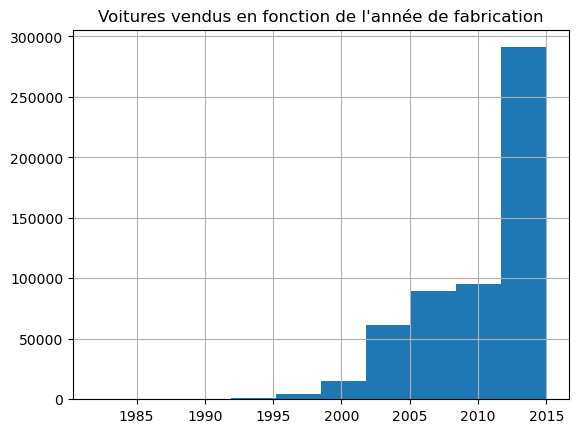

In [299]:
df["year"].hist()
plt.title("Voitures vendus en fonction de l'année de fabrication")
plt.show()

<Axes: xlabel='state'>

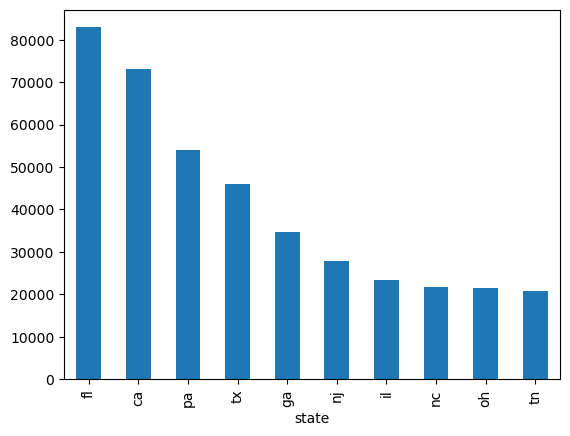

In [300]:
#Voitures vendus par état 
fig=df["state"].value_counts().head(10)
fig.plot(kind="bar")

<Axes: xlabel='sellingprice', ylabel='mmr'>

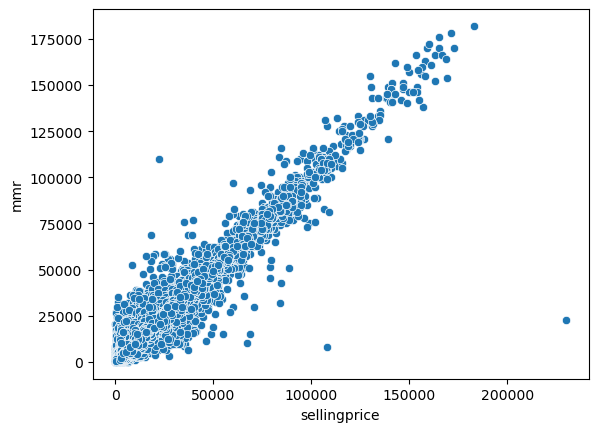

In [301]:
#Relation entre le prix de vente et la valeur estimée 
sns.scatterplot(x=df["sellingprice"],y=df["mmr"])

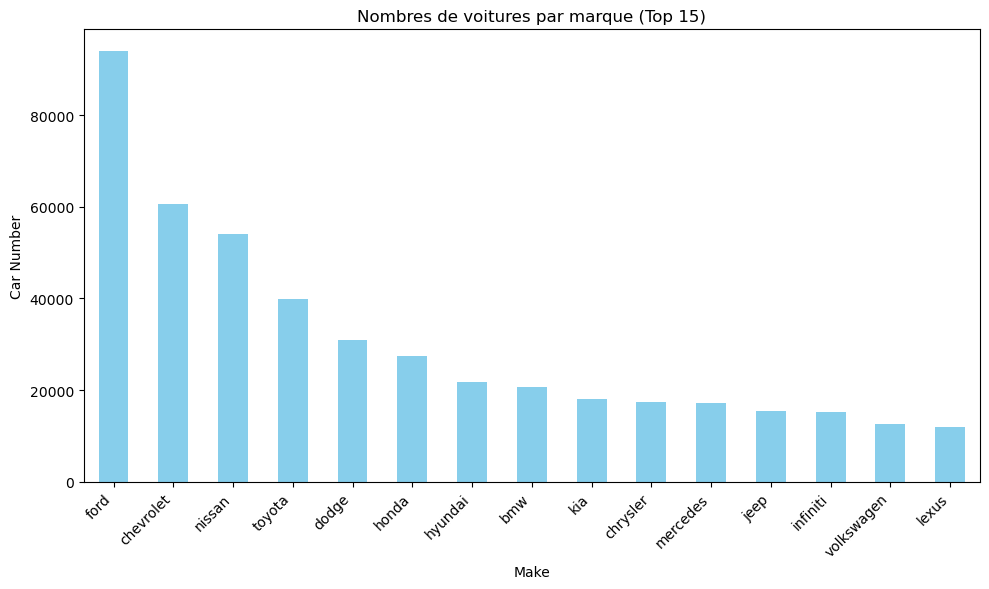

In [302]:
data = df.groupby("make")["year"].count().nlargest(15)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue')
plt.title("Nombres de voitures par marque (Top 15)")
plt.xlabel("Make")
plt.ylabel("Car Number")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [303]:
"""df.boxplot(column=list(df.select_dtypes(include=[np.number])))
plt.show()"""

'df.boxplot(column=list(df.select_dtypes(include=[np.number])))\nplt.show()'

In [304]:
print("Is there any duplicated data?")
data.duplicated().any()

Is there any duplicated data?


False

In [305]:
#Suppression des voitures ayant été vendus a - de 100 dollars
df.drop(df[df["sellingprice"] < 100].index,inplace=True)

In [306]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558833.000000,547013.000000,558740.000000,558795.000000,558821.000000
mean,2010.038974,30.672470,68319.872692,13769.411009,13611.456232
std,3.966798,13.402751,53398.007106,9679.973589,9749.468520
min,1982.000000,1.000000,1.000000,25.000000,100.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


<Axes: xlabel='sellingprice', ylabel='mmr'>

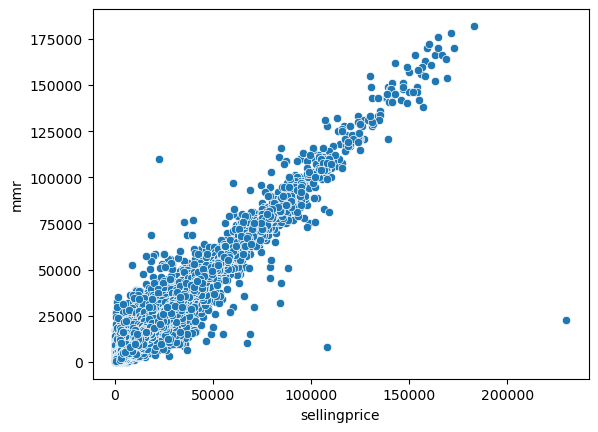

In [307]:
sns.scatterplot(x=df["sellingprice"],y=df["mmr"])

<Axes: xlabel='odometer', ylabel='sellingprice'>

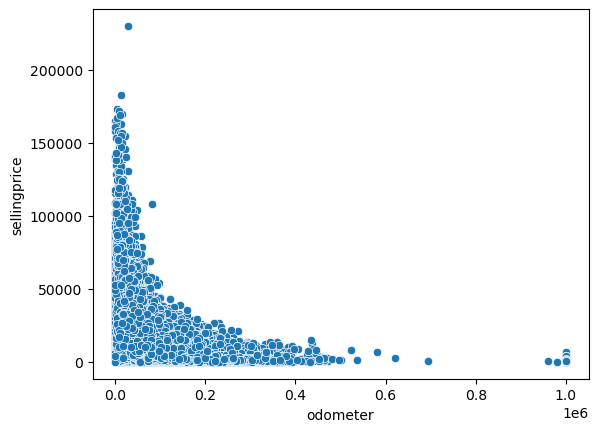

In [308]:
sns.scatterplot(data = df, y = 'sellingprice',x = 'odometer')

#On peut voir une relation entre la baisse du prix et l'augmentation du kilométrage de la voiture

In [309]:
#Suppression des colonnes inutile
df = df.drop(columns=["saledate"])
df = df.drop(columns=["vin"])
df = df.drop(columns=["transmission"])
df = df.drop(columns=["trim"])

In [310]:
#Remplace par 'Other' category
df['make'].fillna('Other', inplace=True)
df['model'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

In [311]:
df.isnull().sum()

year                0
make                0
model               0
body            13195
state               0
condition       11820
odometer           93
color               0
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

In [312]:
#Suppression de la ligne entière lorsqu'il y'a une valeur manquante
df = df.dropna()

In [313]:
#Data cleaning terminé
df.isnull().sum()

year            0
make            0
model           0
body            0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [314]:
df.nunique()


year                26
make                53
model              773
body                86
state               38
condition           41
odometer        166578
color               20
interior            17
seller           12735
mmr               1101
sellingprice      1851
dtype: int64

In [315]:
#z = np.abs(df["nom_colonne"] - df["nom_colonne"].mean()) / df["nom_colonne"].std()
#df = df[z < 3]

PASSAGE A DETECTION + SUPPRESSION DES OUTLIERS

In [316]:
#OUTLIERS

#Avant suppression des lignes outliers
df.isna().sum()

year            0
make            0
model           0
body            0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [317]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,533738.000000,533738.000000,533738.000000,533738.000000,533738.000000
mean,2010.231818,30.801507,66243.416052,14022.296661,13868.991841
std,3.828435,13.368707,52094.639409,9624.079321,9698.131817
min,1990.000000,1.000000,1.000000,25.000000,100.000000
25%,2008.000000,24.000000,27735.000000,7575.000000,7300.000000
50%,2012.000000,35.000000,50135.000000,12500.000000,12400.000000
75%,2013.000000,42.000000,95806.000000,18500.000000,18400.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


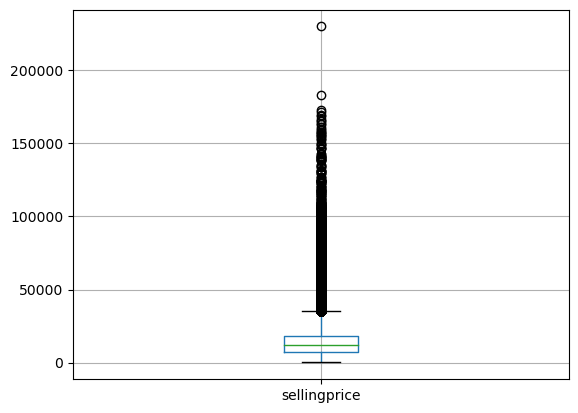

In [318]:
# SELLING PRICE Visualisation of catplot version

df.boxplot("sellingprice")
plt.show()

In [319]:
# calculate IQR for selling price
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_price = df[(df['sellingprice'] < Q1 - threshold * IQR) | (df['sellingprice'] > Q3 + threshold * IQR)]

display(outliers_price)

# Supprimer les valeurs aberrantes price
df = df.drop(outliers_price.index)

,year,make,model,body,state,condition,odometer,color,interior,seller,mmr,sellingprice
4,2014,bmw,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
6,2014,bmw,M5,Sedan,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0
10,2014,audi,A6,Sedan,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0
17,2014,audi,Q5,SUV,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0
19,2014,bmw,6 Series,Convertible,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558775,2014,mercedes,E-Class,sedan,ga,49.0,11448.0,blue,beige,mercedes-benz finc wholesale advantage,40600.0,40500.0
558777,2012,maserati,Quattroporte,sedan,ga,39.0,21923.0,blue,—,maserati north america inc,53300.0,40250.0
558807,2014,mercedes,E-Class,Sedan,ca,45.0,17518.0,black,black,the hertz corporation,64000.0,69500.0
558816,2013,mercedes,G-Class,suv,fl,5.0,26799.0,black,black,fields bmw,104000.0,105000.0


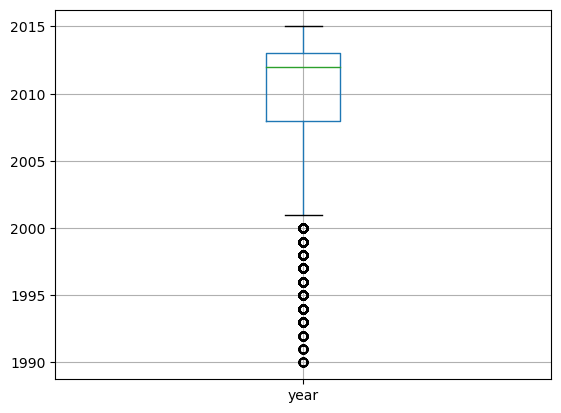

In [320]:
# year Visualisation of catplot version

df.boxplot("year")
plt.show()

In [321]:
# calculate IQR for l'année#
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_year = df[(df['year'] < Q1 - threshold * IQR) | (df['year'] > Q3 + threshold * IQR)]

display(outliers_year)

# Supprimer les valeurs aberrantes year
df = df.drop(outliers_year.index)


,year,make,model,body,state,condition,odometer,color,interior,seller,mmr,sellingprice
5008,2000,bmw,3 Series,Convertible,ca,2.0,116389.0,blue,gray,check into cash inc.,2850.0,2200.0
5010,2000,mazda,Millenia,Sedan,ca,27.0,155695.0,silver,black,nextgear capital,900.0,400.0
5011,1999,honda,Civic,Sedan,ca,1.0,164960.0,silver,gray,gosch ford,1100.0,500.0
5014,1999,lexus,RX 300,SUV,ca,23.0,117026.0,black,beige,honda of pasadena,3600.0,3700.0
5017,2000,toyota,4Runner,SUV,ca,19.0,242711.0,white,brown,premium auto wholesale,2425.0,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558549,1999,mercedes,SLK-Class,convertible,fl,28.0,88371.0,white,black,plus auto sales corp,4025.0,3000.0
558648,2000,volvo,V70,wagon,pa,33.0,125214.0,silver,beige,nico buys cars,1125.0,2500.0
558649,1999,lexus,RX 300,suv,fl,19.0,199179.0,red,tan,jm lexus,3325.0,2600.0
558650,1997,mercedes,S-Class,sedan,pa,28.0,94947.0,—,tan,r hollenshead auto sales inc,2550.0,3200.0


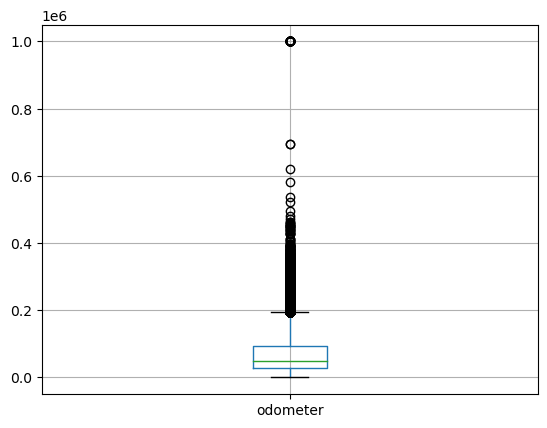

In [322]:
# odometer Visualisation of catplot version

df.boxplot("odometer")
plt.show()

In [323]:
# calculate IQR for odometer
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_odometer = df[(df['odometer'] < Q1 - threshold * IQR) | (df['odometer'] > Q3 + threshold * IQR)]

display(outliers_odometer)

#supprimer outliers odometer
df = df.drop(outliers_odometer.index)

,year,make,model,body,state,condition,odometer,color,interior,seller,mmr,sellingprice
275,2013,hyundai,Elantra Coupe,Elantra Coupe,ca,1.0,999999.0,blue,gray,hyundai motor finance,8025.0,2500.0
1666,2012,nissan,Frontier,King Cab,ca,2.0,227606.0,white,gray,o'reilly auto parts,5000.0,5100.0
2470,2011,toyota,Corolla,Sedan,ca,1.0,291087.0,white,gray,ge fleet services for itself/servicer,7650.0,3600.0
2822,2009,ford,Ranger,Regular Cab,ca,2.0,312235.0,white,gray,o'reilly auto parts,3050.0,2000.0
3060,2008,chevrolet,Impala,Sedan,ca,26.0,198177.0,white,silver,tustin community bank,1950.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558468,2002,chevrolet,Tahoe,suv,fl,27.0,209889.0,black,gray,zimmerman auto brokers inc,1875.0,2400.0
558470,2002,honda,Odyssey,minivan,ma,2.0,215038.0,red,gray,boch new to you superstore,975.0,300.0
558478,2001,toyota,Tundra,access cab,ma,19.0,196470.0,black,tan,boch toyota/scion south,3225.0,3600.0
558768,2011,ford,Fusion Hybrid,sedan,fl,26.0,204835.0,blue,beige,firkins chrysler jeep dodge,7750.0,7400.0


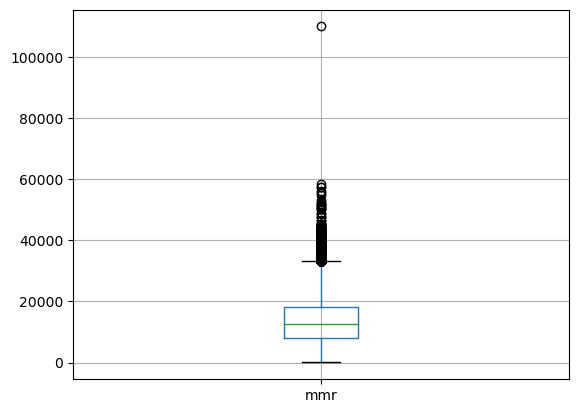

In [324]:
# mmr Visualisation of catplot version

df.boxplot("mmr")
plt.show()

In [325]:
# calculate IQR for mmr
Q1 = df['mmr'].quantile(0.25)
Q3 = df['mmr'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_mmr = df[(df['mmr'] < Q1 - threshold * IQR) | (df['mmr'] > Q3 + threshold * IQR)]

display(outliers_mmr)

# Supprimer les valeurs aberrantes
df = df.drop(outliers_mmr.index)

,year,make,model,body,state,condition,odometer,color,interior,seller,mmr,sellingprice
21,2014,bmw,5 Series,Sedan,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0
83,2014,audi,TTS,Coupe,ca,28.0,3996.0,silver,black,fratelli investment group,41400.0,34250.0
89,2014,chevrolet,Silverado 2500HD,Crew Cab,ca,36.0,8742.0,white,gray,enterprise fleet management exchange inc.,34000.0,34000.0
109,2014,cadillac,SRX,SUV,ca,44.0,8683.0,white,black,lease plan usa,33500.0,30000.0
228,2013,hyundai,Equus,Sedan,ca,43.0,11566.0,white,beige,hyundai buybacks,36800.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558306,2011,audi,Q7,suv,pa,5.0,52743.0,silver,beige,r hollenshead auto sales inc,33300.0,31600.0
558557,2012,dodge,Challenger,coupe,nv,5.0,25237.0,yellow,black,lotus of las vegas,33700.0,34750.0
558587,2010,ford,F-150,supercab,pa,43.0,57388.0,orange,black,r hollenshead auto sales inc,34400.0,34250.0
558779,2015,buick,Regal,sedan,mi,5.0,5678.0,black,black,gm remarketing,33900.0,18900.0


In [326]:

# Afficher le DataFrame sans valeurs aberrantes
print(df)

        year    make     model       body state  condition  odometer  color  \
0       2015     kia   Sorento        SUV    ca        5.0   16639.0  white   
1       2015     kia   Sorento        SUV    ca        5.0    9393.0  white   
2       2014     bmw  3 Series      Sedan    ca       45.0    1331.0   gray   
3       2015   volvo       S60      Sedan    ca       41.0   14282.0  white   
5       2015  nissan    Altima      Sedan    ca        1.0    5554.0   gray   
...      ...     ...       ...        ...   ...        ...       ...    ...   
558831  2011     bmw  5 Series      Sedan    fl       39.0   66403.0  white   
558833  2012     ram      2500   Crew Cab    wa        5.0   54393.0  white   
558834  2012     bmw        X5        SUV    ca       48.0   50561.0  black   
558835  2015  nissan    Altima      sedan    ga       38.0   16658.0  white   
558836  2014    ford     F-150  SuperCrew    ca       34.0   15008.0   gray   

       interior                                    

In [327]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,492652.000000,492652.000000,492652.000000,492652.000000,492652.000000
mean,2010.499247,31.162918,62618.861764,13325.088704,13168.820691
std,3.354242,13.043580,43909.632779,7204.847600,7329.961290
min,2001.000000,1.000000,1.000000,25.000000,100.000000
25%,2008.000000,25.000000,28215.750000,8075.000000,7800.000000
50%,2012.000000,35.000000,49735.000000,12500.000000,12400.000000
75%,2013.000000,42.000000,92050.000000,17900.000000,17800.000000
max,2015.000000,49.000000,193744.000000,33100.000000,35000.000000


In [328]:
df.isnull().sum()

year            0
make            0
model           0
body            0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [329]:
df.isnull().any()

year            False
make            False
model           False
body            False
state           False
condition       False
odometer        False
color           False
interior        False
seller          False
mmr             False
sellingprice    False
dtype: bool

c:\Users\X\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


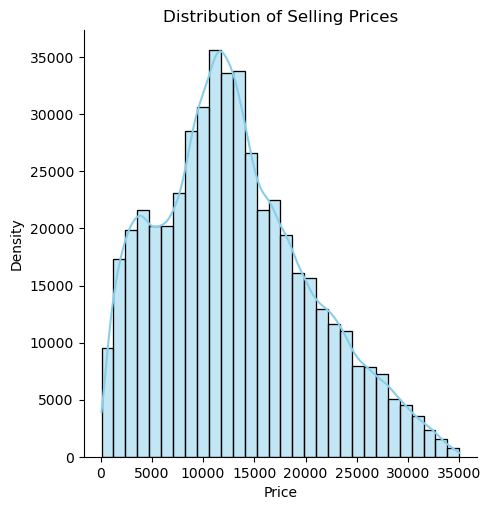

In [330]:
sns.displot(df['sellingprice'], bins=30, kde=True, color='skyblue')  # Add KDE for density visualization
plt.title('Distribution of Selling Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

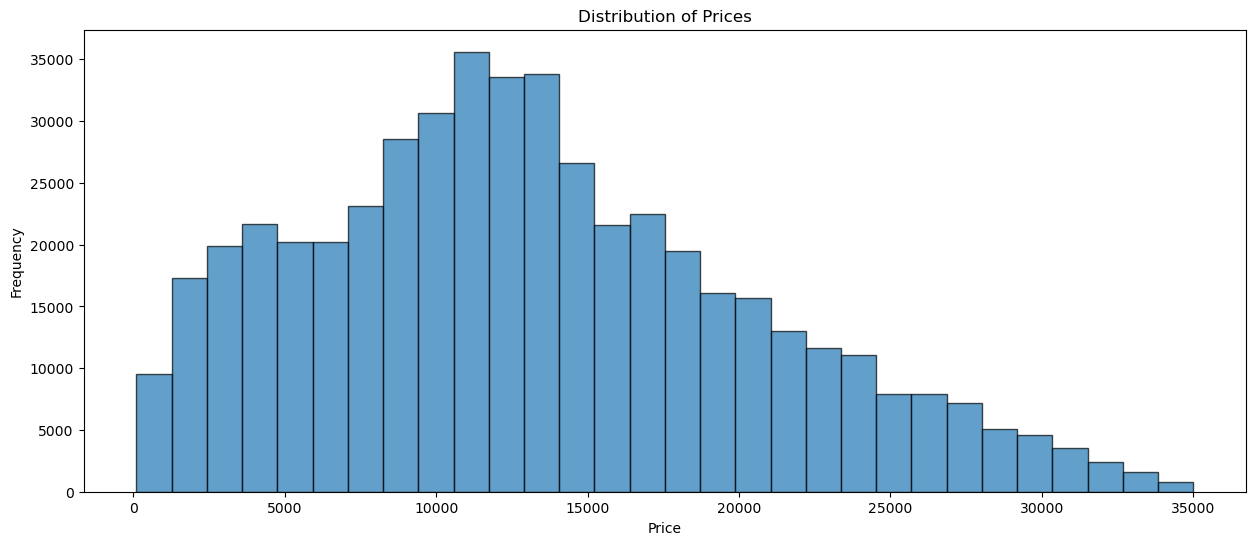

In [331]:
plt.figure(figsize=(15, 6))
plt.hist(df['sellingprice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

PASSAGE A LA REGRESSION LINEAIRE

In [332]:
# Assuming your DataFrame is named 'df'

# Create a list containing the feature column names
features_list = ["year", "make", "body",
                 "state", "condition", "odometer", "color", "interior", "seller", "mmr"]

# Select features (all columns except 'sellingprice')
X = df[features_list]

# Select the target variable (sellingprice)
y = df['sellingprice']

# Print confirmation message
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

print("...Done.")

Features (X):
   year    make   body state  condition  odometer  color interior  \
0  2015     kia    SUV    ca        5.0   16639.0  white    black   
1  2015     kia    SUV    ca        5.0    9393.0  white    beige   
2  2014     bmw  Sedan    ca       45.0    1331.0   gray    black   
3  2015   volvo  Sedan    ca       41.0   14282.0  white    black   
5  2015  nissan  Sedan    ca        1.0    5554.0   gray    black   

                                              seller      mmr  
0                            kia motors america  inc  20500.0  
1                            kia motors america  inc  20800.0  
2             financial services remarketing (lease)  31900.0  
3                            volvo na rep/world omni  27500.0  
5  enterprise vehicle exchange / tra / rental / t...  15350.0  

Target Variable (y):
0    21500.0
1    21500.0
2    30000.0
3    27750.0
5    10900.0
Name: sellingprice, dtype: float64
...Done.


In [333]:
df.isnull().any()

year            False
make            False
model           False
body            False
state           False
condition       False
odometer        False
color           False
interior        False
seller          False
mmr             False
sellingprice    False
dtype: bool

In [334]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")  

Splitting dataset into train set and test set...
...Done.


In [335]:
# Missing values
print("Imputing missing values...")
print(X_train)
print()
imputer = SimpleImputer(strategy="mean") # Instanciate class of SimpleImputer with strategy of mean

X_train.iloc[:,[4,5,9]] = imputer.fit_transform(X_train.iloc[:,[4,5,9]]) # Fit and transform columns where there are missing values
print("...Done!")
print(X_train) 
print()  

Imputing missing values...
        year       make       body state  condition  odometer   color  \
523367  2012       jeep        suv    pa       49.0   24316.0  orange   
356917  2011     jaguar      Sedan    fl       27.0   28775.0   black   
341395  2014     subaru      Wagon    nj       49.0   11662.0       —   
172697  2013     subaru        SUV    pa       24.0   33448.0   black   
459672  2014  chevrolet      Sedan    fl        4.0   19421.0   white   
...      ...        ...        ...   ...        ...       ...     ...   
499152  2011   mercedes        suv    ca       25.0   34132.0   black   
143348  2006        kia      Sedan    il       27.0  118565.0   black   
495517  2001      honda      sedan    nj       35.0   97522.0   white   
351627  2013     nissan  Hatchback    tx       39.0   41002.0    blue   
523962  2012     nissan      sedan    fl       19.0   25330.0   black   

       interior                               seller      mmr  
523367    black                b

In [336]:
# Accéder à l'objet index
index_df = df.index

# Accéder aux noms des colonnes
noms_colonnes = df.columns

# Combiner les index et les noms des colonnes
index_avec_colonnes = list(zip(index_df, noms_colonnes))

# Afficher les index avec les noms des colonnes
print(index_avec_colonnes)

[(0, 'year'), (1, 'make'), (2, 'model'), (3, 'body'), (5, 'state'), (7, 'condition'), (8, 'odometer'), (9, 'color'), (11, 'interior'), (12, 'seller'), (13, 'mmr'), (15, 'sellingprice')]


In [337]:
# Missing values
print("Imputing missing values...")
print(X_test)
print()
imputer = SimpleImputer(strategy="mean") # Instanciate class of SimpleImputer with strategy of mean

X_test.iloc[:,[4,5,9]] = imputer.fit_transform(X_test.iloc[:,[4,5,9]]) # Fit and transform columns where there are missing values
print("...Done!")
print(X_test) 
print() 

Imputing missing values...
        year        make      body state  condition  odometer   color  \
195421  2007        ford       SUV    nj       19.0   99219.0    gray   
186836  2004         gmc       SUV    fl       36.0   90918.0   white   
287258  2009         kia     Sedan    fl        2.0  117672.0  silver   
279793  2008  land rover       SUV    tx       21.0   81379.0  silver   
13968   2009       honda       SUV    fl       35.0   80191.0    gray   
...      ...         ...       ...   ...        ...       ...     ...   
66955   2006       dodge  Quad Cab    oh        4.0   92915.0   black   
217123  2012       honda     Sedan    ga       43.0   28747.0    gray   
272003  2014         kia     Wagon    oh       49.0   10818.0     red   
295669  2011     hyundai     Sedan    in       48.0   42347.0    gray   
61661   2013       honda       SUV    pa       31.0   39286.0    gray   

       interior                                 seller      mmr  
195421     gray       holman f

In [338]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()


numeric_features = [4,5,9]
numeric_transformer = StandardScaler()

categorical_features = [0, 1, 2, 3, 6, 7, 8]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done.")
print(X_train[:5]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...



...Done.
  (0, 11)	1.0
  (0, 33)	1.0
  (0, 131)	1.0
  (0, 165)	1.0
  (0, 186)	1.0
  (0, 196)	1.0
  (0, 1686)	1.0
  (0, 11330)	1.368318679971104
  (0, 11331)	-0.8718326089781948
  (0, 11332)	2.6051029221079274
  (1, 10)	1.0
  (1, 32)	1.0
  (1, 90)	1.0
  (1, 142)	1.0
  (1, 176)	1.0
  (1, 196)	1.0
  (1, 3118)	1.0
  (1, 11330)	-0.3200218320364048
  (1, 11331)	-0.7702194198170914
  (1, 11332)	1.6889564490697517
  (2, 13)	1.0
  (2, 54)	1.0
  (2, 96)	1.0
  (2, 156)	1.0
  (2, 194)	1.0
  (2, 196)	1.0
  (2, 9924)	1.0
  (2, 11330)	1.368318679971104
  (2, 11331)	-1.1601962097058471
  (2, 11332)	1.244764219717909
  (3, 12)	1.0
  (3, 54)	1.0
  (3, 89)	1.0
  (3, 165)	1.0
  (3, 176)	1.0
  (3, 201)	1.0
  (3, 5686)	1.0
  (3, 11330)	-0.5502500836737924
  (3, 11331)	-0.6637295268029995
  (3, 11332)	0.6131783936082577
  (4, 13)	1.0
  (4, 20)	1.0
  (4, 90)	1.0
  (4, 142)	1.0
  (4, 192)	1.0
  (4, 195)	1.0
  (4, 4624)	1.0
  (4, 11330)	-2.0851050945897094
  (4, 11331)	-0.9833815125313683
  (4, 11332)	0.2106291

In [339]:

### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
###print("Standardizing numerical features...")
###print(X_test)
###print()

X_test = featureencoder.transform(X_test)

###print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
###print()

--- Testing pipeline ---
  (0, 6)	1.0
  (0, 25)	1.0
  (0, 89)	1.0
  (0, 156)	1.0
  (0, 182)	1.0
  (0, 201)	1.0
  (0, 5083)	1.0
  (0, 11330)	-0.9339638364027716
  (0, 11331)	0.8350821045750966
  (0, 11332)	-1.0941854879628878
  (1, 3)	1.0
  (1, 26)	1.0
  (1, 89)	1.0
  (1, 142)	1.0
  (1, 192)	1.0
  (1, 195)	1.0
  (1, 719)	1.0
  (1, 11330)	0.37066292287575797
  (1, 11331)	0.6459161294178148
  (1, 11332)	-0.6638742657782902
  (2, 8)	1.0
  (2, 34)	1.0
  (2, 90)	1.0
  (2, 142)	1.0
  (2, 190)	1.0
  (2, 201)	1.0
  (2, 4621)	1.0
  (2, 11330)	-2.238590595681301
  (2, 11331)	1.255595264384435
  (2, 11332)	-1.4169189046013362
  (3, 7)	1.0
  (3, 35)	1.0
  (3, 89)	1.0
  (3, 170)	1.0
  (3, 190)	1.0
  (3, 196)	1.0
  (3, 8818)	1.0
  (3, 11330)	-0.7804783353111799
  (3, 11331)	0.42853819458763653
  (3, 11332)	1.0920731408782132
  (4, 8)	1.0
  (4, 27)	1.0
  (4, 89)	1.0
  (4, 142)	1.0
  (4, 182)	1.0
  (4, 195)	1.0
  (4, 11183)	1.0
  (4, 11330)	0.2939201723299621
  (4, 11331)	0.40146565170282134
  (4, 1133

In [340]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [341]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[31977.52765027 25023.38247202 22432.57866931 16856.05748648
 15137.94699368]



In [342]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 5182.60511847  9857.4062814   2014.79788631 18273.25361564
 14284.31269815]



In [343]:
# Performance assessment
print("--- Assessing the performances of the model ---")

score_r2_entrainement = regressor.score(X_train, y_train)
score_r2_test = regressor.score(X_test, y_test)

# Print R^2 scores
print("R2 score on training set : ", score_r2_entrainement)
print("R2 score on test set : ", score_r2_test )

--- Assessing the performances of the model ---
R2 score on training set :  0.9651206457178327
R2 score on test set :  0.9624029634481235


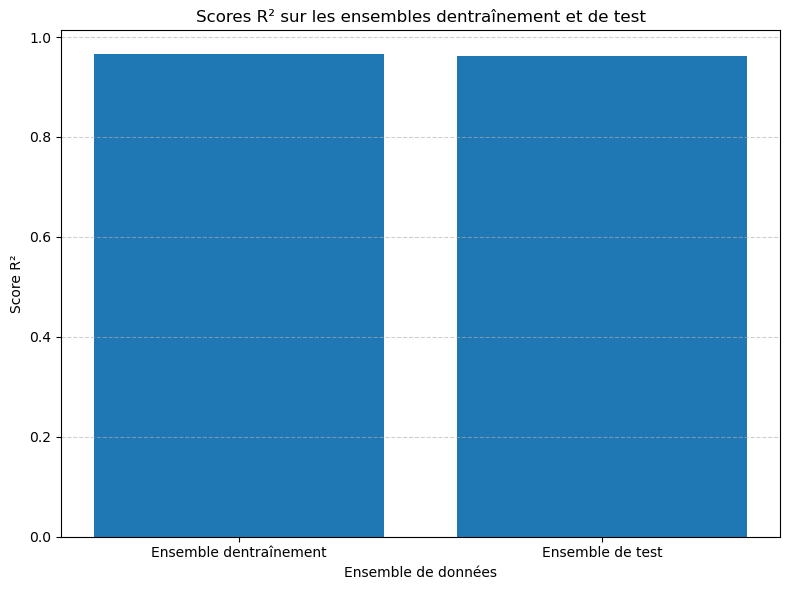

In [344]:
# Créer un histogramme à barres
plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure si nécessaire
plt.bar(['Ensemble dentraînement', 'Ensemble de test'], [score_r2_entrainement, score_r2_test])
plt.xlabel('Ensemble de données')
plt.ylabel('Score R²')
plt.title('Scores R² sur les ensembles dentraînement et de test')
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Ajouter un quadrillage discret
plt.tight_layout()  # Ajuster l'espacement pour une meilleure présentation
plt.show()

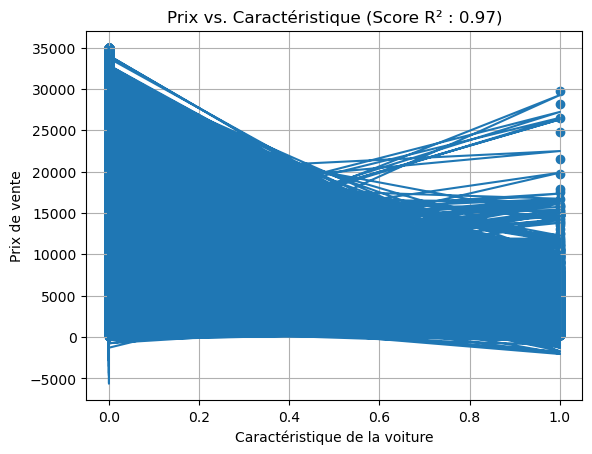

In [348]:
dense_array = X_train[:, 0].toarray().ravel()
plt.scatter(dense_array, y_train)
plt.plot(dense_array, regressor.predict(X_train))
plt.xlabel("Caractéristique de la voiture")
plt.ylabel("Prix de vente")
plt.title("Prix vs. Caractéristique (Score R² : {:.2f})".format(score_r2_entrainement))
plt.grid(True)
plt.show()

PASSAGE AU FEATURE IMPORTANCE

In [ ]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

# Nombre de coefficients
nombre_coefficients = df.size

print(nombre_coefficients)

coefficients are:  [ 225.32888612  191.33506421  151.11914011 ...  428.38370851 -125.38269571
 6858.0706099 ]
Constant is:  13073.512707302249
5911824


In [ ]:
X_train[:5] # Visualize the first 5 rows of your X_train

<5x11333 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2, 3, 6, 7, 8]), ('num', StandardScaler(), [4, 5, 9])]
One Hot Encoder transformer is:  OneHotEncoder(handle_unknown='ignore')


In [ ]:
# Assuming regressor is a fitted regression model with numerical coefficients

# Get the number of coefficients
nombre_coefficients = len(regressor.coef_)

# Print the number of coefficients
print("Nombre de coefficients:", nombre_coefficients)

# Get the absolute values of the coefficients
abs_coefficients = np.abs(regressor.coef_)

# Extract the indices of the top 5 coefficients (in descending absolute value)
top_5_coefficients = np.argsort(abs_coefficients)[-5:]

# Print the indices of the top 5 coefficients
print("Indices des 5 coefficients les plus importants (valeur absolue décroissante):", top_5_coefficients)

Nombre de coefficients: 11333
Indices des 5 coefficients les plus importants (valeur absolue décroissante): [3695 7559 1088 9280 9476]


In [ ]:
# Assuming `df` is your DataFrame with feature names as column titles
features = df.columns

# ... (your existing code to get abs_coefficients)

# Check if there are at least 5 coefficients
if len(abs_coefficients) < 5:
    print("There are less than 5 coefficients. No features to display.")
else:
    # Limit the number of features to 5 (or the actual number of coefficients)
    top_n_features = min(len(abs_coefficients), 5)

    # Create a list of tuples containing feature-coefficient pairs
    feature_importance = []
    for i in range(top_n_features):
        feature_importance.append((features[i], abs_coefficients[i]))

    # Create a DataFrame from the list of tuples
    top_features_df = pd.DataFrame(feature_importance, columns=['Feature', 'Absolute Coefficient'])

    # Print the DataFrame with clear labeling
    print("Top 5 Features and Their Absolute Coefficients :")
    print(top_features_df)

Top 5 Features and Their Absolute Coefficients :
  Feature  Absolute Coefficient
0    year            225.328886
1    make            191.335064
2   model            151.119140
3    body            117.679644
4   state             91.338558
